<a href="https://colab.research.google.com/github/vsbca/Data-Science/blob/master/intro_to_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
sns.set(style="ticks")
%matplotlib inline

pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)


Step #1: Load and Explore Data

In [4]:
#data link: https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-03.csv
df = pd.read_csv("https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-03.csv")
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1.0,22.0,3.0,0.5,2.00,0.0,0.3,27.80,2.5
1,2.0,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,N,193,193,2.0,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0
2,1.0,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,N,246,90,1.0,6.0,3.0,0.5,1.95,0.0,0.3,11.75,2.5
3,2.0,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,N,151,238,1.0,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5
4,1.0,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,N,79,261,1.0,16.5,3.0,0.5,4.05,0.0,0.3,24.35,2.5


In [5]:
df.shape

(3007292, 18)

In [8]:
#print all the columns
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge'], dtype='object')

In [9]:
#List the top 5 rows
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1.0,22.0,3.0,0.5,2.00,0.0,0.3,27.80,2.5
1,2.0,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,N,193,193,2.0,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0
2,1.0,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,N,246,90,1.0,6.0,3.0,0.5,1.95,0.0,0.3,11.75,2.5
3,2.0,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,N,151,238,1.0,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5
4,1.0,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,N,79,261,1.0,16.5,3.0,0.5,4.05,0.0,0.3,24.35,2.5


In [10]:
#Describe the dataframe
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,2.969805e+06,2.969805e+06,3.007292e+06,2.969805e+06,3.007292e+06,3.007292e+06,2.969805e+06,3.007292e+06,3.007292e+06,3.007292e+06,3.007292e+06,3.007292e+06,3.007292e+06,3.007292e+06,3.007292e+06
mean,1.667242e+00,1.467486e+00,3.116722e+00,1.051378e+00,1.634186e+02,1.609385e+02,1.267743e+00,1.269675e+01,1.246666e+00,6.580587e-01,2.138793e+00,3.041657e-01,2.975907e-01,1.884122e+01,2.241648e+00
std,4.712009e-01,1.120098e+00,2.069343e+02,7.109302e-01,6.658183e+01,7.073925e+01,4.765033e-01,3.871551e+02,2.883275e+02,2.883250e+02,2.719280e+00,1.607296e+00,3.710814e-02,6.945971e+02,7.841027e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.259000e+03,-7.000000e+00,-5.000000e-01,-4.932200e+02,-4.000000e+01,-3.000000e-01,-1.260300e+03,-2.500000e+00
25%,1.000000e+00,1.000000e+00,9.900000e-01,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.670000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.920000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00
75%,2.000000e+00,1.000000e+00,3.020000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,2.860000e+00,0.000000e+00,3.000000e-01,1.985000e+01,2.500000e+00
max,2.000000e+00,9.000000e+00,2.698037e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.711001e+05,5.000008e+05,5.000005e+05,8.000000e+02,6.010200e+02,3.000000e-01,1.000004e+06,2.500000e+00


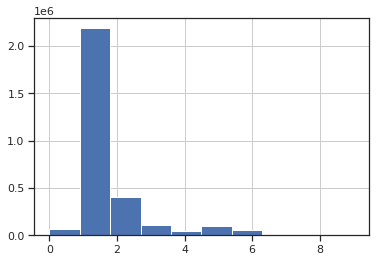

In [11]:
#Put the histogram for the passenger
df.passenger_count.hist()

In [12]:
#print the data type of each variable
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

# Let's clean the data
1. Identify extreme/outlier
2. Impute missing values
3. Drop not important columns
4. Drop columns with problemtic values

In [15]:
#Get a small random sample
df_sample = df.sample(n=1000, random_state=6)

#collect fares from the sample, make a numpy array
fares = df_sample["fare_amount"].values

#Collect trip length
trip_length = df_sample["trip_distance"].values


Text(0.5, 1.0, 'NYC car hire data')

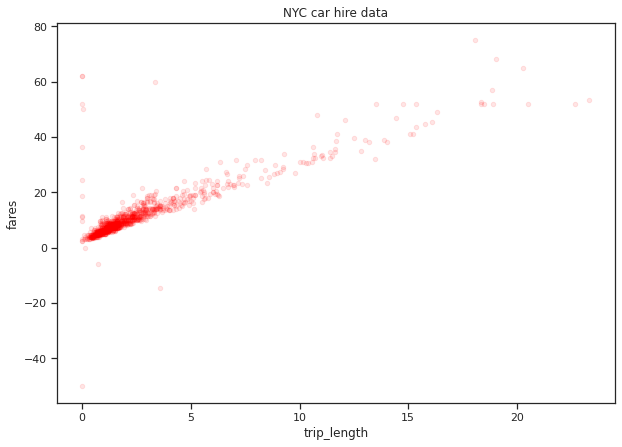

In [17]:
#Let's plot the fare and trip length
fig, ax = plt.subplots(1,1, figsize=(10,7))

ax.scatter(trip_length, fares, color='red', alpha=0.1, s=20)

ax.set_xlabel('trip_length')
ax.set_ylabel('fares')
ax.set_title("NYC car hire data")

# **#Modeling the data**

In [19]:
#Let's model the data
# we would predict the fare based on the distance travelled. 
y = df_sample["fare_amount"].values
X = df_sample["trip_distance"].values
X.shape

(1000,)

In [21]:
regression = LinearRegression(fit_intercept=True)
regression.fit(X, y)
# this is the estimated statistical model (f_hat) using the predicted coefficients 
regression_line = lambda x: regression.intercept_ + regression.coef_ * x
print('The estimated equation of the regression line is: {} + {} * x'.format(regression.intercept_, regression.coef_[0]))

ValueError: ignored